In [5]:
import pandas as pd

# 1. Carregar o arquivo
df = pd.read_csv('dados_tratados.csv')

# 2. Remover colunas inúteis (ex.: identificador único)
df = df.drop(columns=['customerID', 'Contas_Diarias'])

df.head()

,Cancelou,gênero,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Faturamento_Mensal,Faturamento_Total
0,0.0,female,0,1,1,9,1,no,dsl,no,yes,no,yes,yes,no,one year,1,mailed check,65.6,593.30
1,0.0,male,0,0,0,9,1,yes,dsl,no,no,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40
2,1.0,male,0,0,0,4,1,no,fiber optic,no,no,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85
3,1.0,male,1,1,0,13,1,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85
4,1.0,female,1,1,0,3,1,no,fiber optic,no,no,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40


In [16]:
# Identificar as colunas categóricas
categorical_cols = df.select_dtypes(include='object').columns
print("Colunas categóricas a serem codificadas:", categorical_cols)

# Aplicar one-hot encoding nas colunas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame após one-hot encoding:")
display(df_encoded.head())

Colunas categóricas a serem codificadas: Index(['gênero', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod'],
      dtype='object')

DataFrame após one-hot encoding:


,Cancelou,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Faturamento_Mensal,Faturamento_Total,gênero_male,...,TechSupport_yes,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0.0,0,1,1,9,1,1,65.6,593.30,False,...,True,False,True,False,False,True,False,False,False,True
1,0.0,0,0,0,9,1,0,59.9,542.40,True,...,False,False,False,False,True,False,False,False,False,True
2,1.0,0,0,0,4,1,1,73.9,280.85,True,...,False,False,False,False,False,False,False,False,True,False
3,1.0,1,1,0,13,1,1,98.0,1237.85,True,...,False,False,True,False,True,False,False,False,True,False
4,1.0,1,1,0,3,1,1,83.9,267.40,False,...,True,False,True,False,False,False,False,False,False,True


In [17]:
# Calcular a proporção de clientes que evadiram (Cancelou == 1)
churn_proportion = df['Cancelou'].value_counts(normalize=True) * 100

print("Proporção de clientes que evadiram (1.0) vs. permaneceram (0.0):")
print(churn_proportion)

if churn_proportion[1.0] > 50 or churn_proportion[0.0] > 50:
    print("\nObservação: Há um desequilíbrio significativo entre as classes.")
else:
    print("\nObservação: O desequilíbrio entre as classes não é significativo.")

Proporção de clientes que evadiram (1.0) vs. permaneceram (0.0):
Cancelou
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64

Observação: Há um desequilíbrio significativo entre as classes.


In [25]:
from imblearn.over_sampling import SMOTE

# Separar features (X) e target (y)
X = df_encoded.drop('Cancelou', axis=1)
y = df_encoded['Cancelou']

# Remover linhas com valores NaN na coluna 'Cancelou' do X e y
nan_rows = y.isna()
X_cleaned = X[~nan_rows]
y_cleaned = y[~nan_rows]

# Preencher valores NaN na coluna 'Faturamento_Total' com a média
X_cleaned['Faturamento_Total'].fillna(X_cleaned['Faturamento_Total'].mean(), inplace=True)


# Inicializar o SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)

print("Shape do X original:", X.shape)
print("Shape do y original:", y.shape)
print("Shape do X limpo:", X_cleaned.shape)
print("Shape do y limpo:", y_cleaned.shape)
print("Shape do X resampleado:", X_resampled.shape)
print("Shape do y resampleado:", y_resampled.shape)

print("\nProporção da classe target após SMOTE:")
print(y_resampled.value_counts(normalize=True) * 100)

Shape do X original: (7267, 30)
Shape do y original: (7267,)
Shape do X limpo: (7043, 30)
Shape do y limpo: (7043,)
Shape do X resampleado: (10348, 30)
Shape do y resampleado: (10348,)

Proporção da classe target após SMOTE:
Cancelou
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


/tmp/ipython-input-2491143939.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_cleaned['Faturamento_Total'].fillna(X_cleaned['Faturamento_Total'].mean(), inplace=True)
/tmp/ipython-input-2491143939.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['Faturamento_Total'].fillna(X_cleaned['Faturamento_Total'].mean(), inplace=Tru

In [21]:
print("Contagem de valores NaN por coluna em X_cleaned:")
print(X_cleaned.isnull().sum()[X_cleaned.isnull().sum() > 0])

Contagem de valores NaN por coluna em X_cleaned:
Faturamento_Total    11
dtype: int64


In [23]:
# Preencher valores NaN na coluna 'Faturamento_Total' com a média
X_cleaned['Faturamento_Total'].fillna(X_cleaned['Faturamento_Total'].mean(), inplace=True)

print("Contagem de valores NaN por coluna em X_cleaned após imputação:")
print(X_cleaned.isnull().sum()[X_cleaned.isnull().sum() > 0])

Contagem de valores NaN por coluna em X_cleaned após imputação:
Series([], dtype: int64)


/tmp/ipython-input-1030613692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_cleaned['Faturamento_Total'].fillna(X_cleaned['Faturamento_Total'].mean(), inplace=True)
/tmp/ipython-input-1030613692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['Faturamento_Total'].fillna(X_cleaned['Faturamento_Total'].mean(), inplace=True)

In [26]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a padronização aos dados reamostrados (features)
X_scaled = scaler.fit_transform(X_resampled)

# X_scaled agora é um array numpy, podemos convertê-lo de volta para DataFrame se necessário para visualização ou outras operações
X_scaled_df = pd.DataFrame(X_scaled, columns=X_resampled.columns)

print("DataFrame de features padronizado:")
display(X_scaled_df.head())

DataFrame de features padronizado:


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Faturamento_Mensal,Faturamento_Total,gênero_male,MultipleLines_no phone service,...,TechSupport_yes,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,-0.395876,1.280019,1.896056,-0.777767,0.33818,0.821569,-0.084657,-0.666050,-1.167517,-0.33818,...,1.562467,-0.449908,1.114128,-0.449908,-0.897914,2.046208,-0.465199,-0.527261,-0.961506,1.795939
1,-0.395876,-0.781238,-0.527411,-0.777767,0.33818,-1.217183,-0.283134,-0.689335,0.856518,-0.33818,...,-0.640013,-0.449908,-0.897563,-0.449908,1.113693,-0.488709,-0.465199,-0.527261,-0.961506,1.795939
2,-0.395876,-0.781238,-0.527411,-0.986220,0.33818,0.821569,0.204354,-0.808985,0.856518,-0.33818,...,-0.640013,-0.449908,-0.897563,-0.449908,-0.897914,-0.488709,-0.465199,-0.527261,1.040035,-0.556812
3,2.526041,1.280019,-0.527411,-0.611005,0.33818,0.821569,1.043528,-0.371189,0.856518,-0.33818,...,-0.640013,-0.449908,1.114128,-0.449908,1.113693,-0.488709,-0.465199,-0.527261,1.040035,-0.556812
4,2.526041,1.280019,-0.527411,-1.027911,0.33818,0.821569,0.552559,-0.815138,-1.167517,-0.33818,...,1.562467,-0.449908,1.114128,-0.449908,-0.897914,-0.488709,-0.465199,-0.527261,-0.961506,1.795939


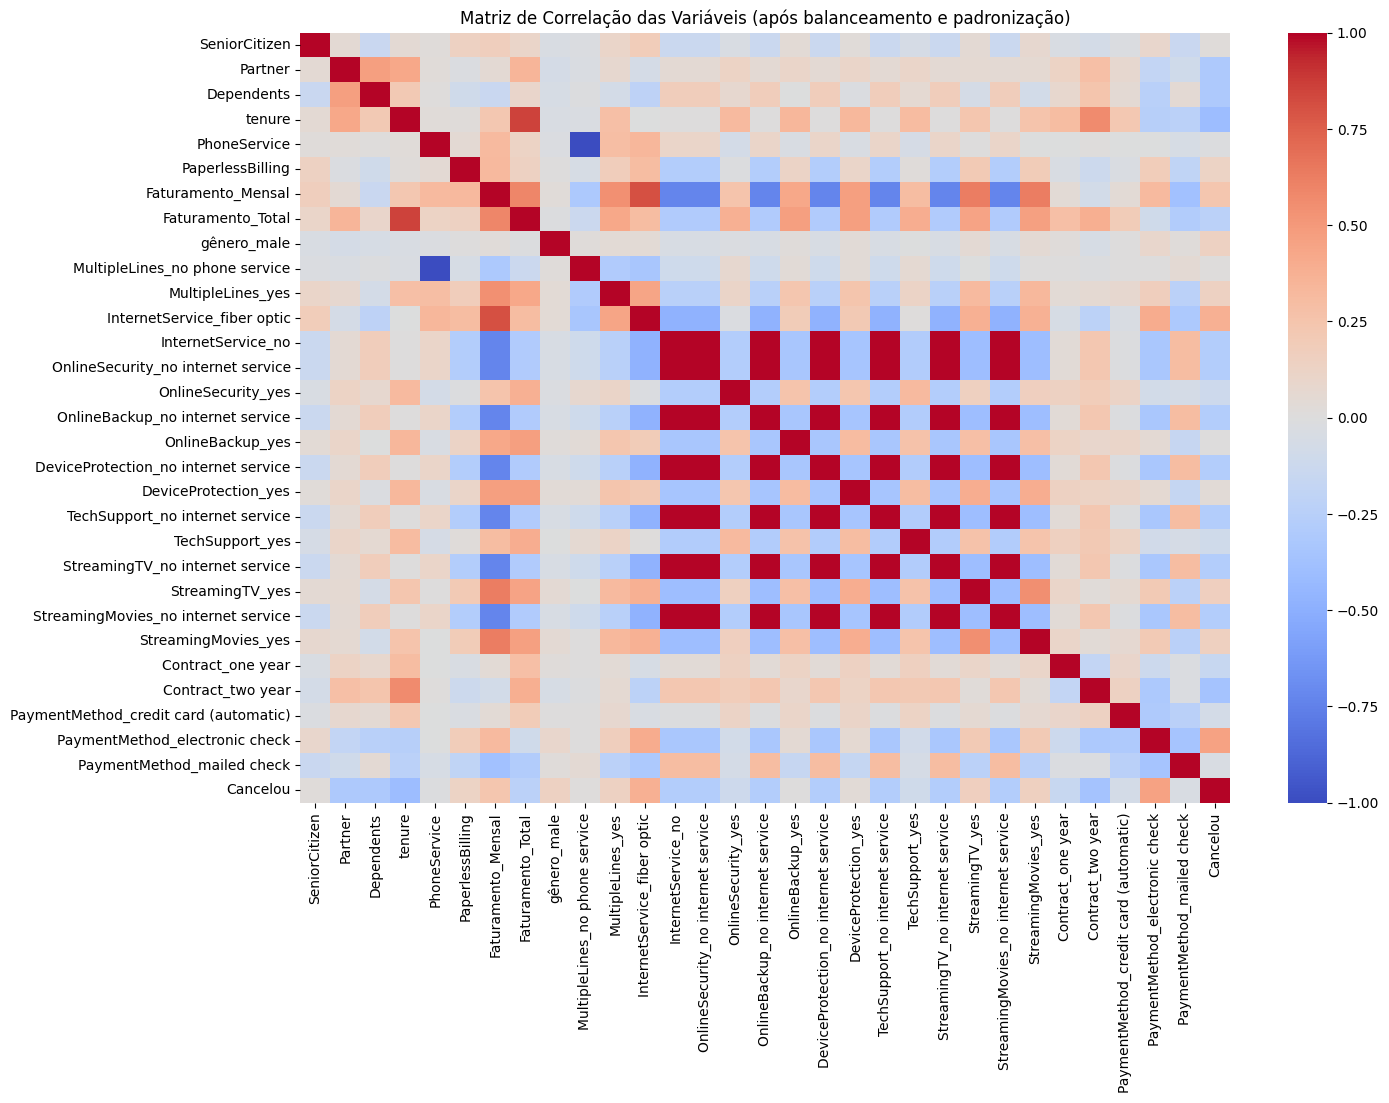

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combinar as features padronizadas e a variável target reamostrada
# Certifique-se de que os índices correspondem se necessário
df_balanced = X_scaled_df.copy()
df_balanced['Cancelou'] = y_resampled.values # Adiciona a coluna target

# Calcular a matriz de correlação
correlation_matrix = df_balanced.corr()

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis (após balanceamento e padronização)')
plt.show()

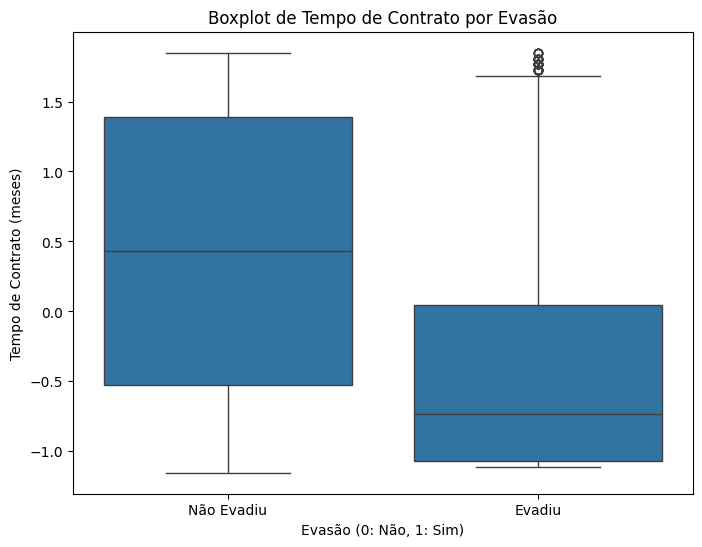

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de Tempo de Contrato (tenure) vs. Evasão (Cancelou)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cancelou', y='tenure', data=df_balanced)
plt.title('Boxplot de Tempo de Contrato por Evasão')
plt.xlabel('Evasão (0: Não, 1: Sim)')
plt.ylabel('Tempo de Contrato (meses)')
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])
plt.show()

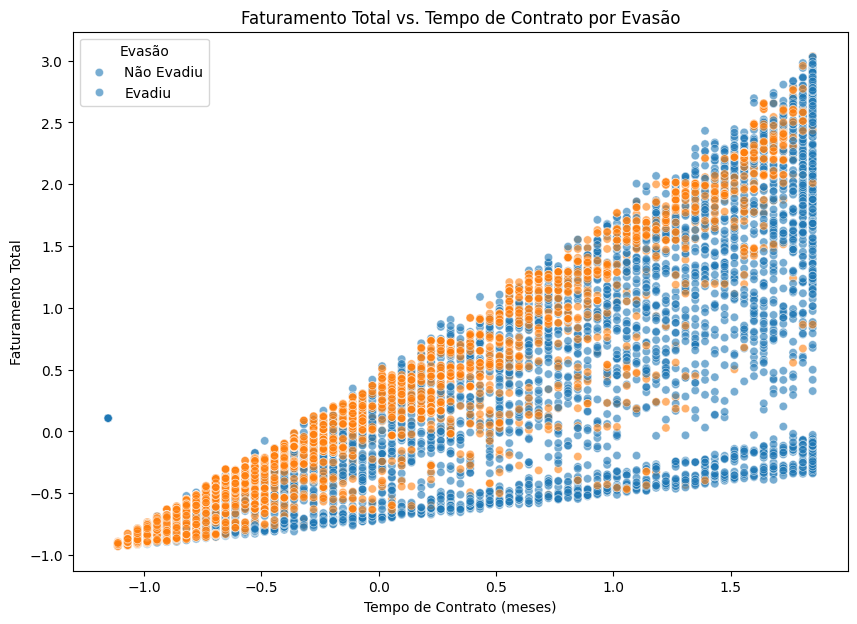

In [29]:
# Scatter plot de Faturamento Total vs. Tempo de Contrato, colorido por Evasão
plt.figure(figsize=(10, 7))
sns.scatterplot(x='tenure', y='Faturamento_Total', hue='Cancelou', data=df_balanced, alpha=0.6)
plt.title('Faturamento Total vs. Tempo de Contrato por Evasão')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Faturamento Total')
plt.legend(title='Evasão', labels=['Não Evadiu', 'Evadiu'])
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Shape do X_train:", X_train.shape)
print("Shape do X_test:", X_test.shape)
print("Shape do y_train:", y_train.shape)
print("Shape do y_test:", y_test.shape)

print("\nProporção da classe target em y_train:")
print(y_train.value_counts(normalize=True) * 100)

print("\nProporção da classe target em y_test:")
print(y_test.value_counts(normalize=True) * 100)

Shape do X_train: (8278, 30)
Shape do X_test: (2070, 30)
Shape do y_train: (8278,)
Shape do y_test: (2070,)

Proporção da classe target em y_train:
Cancelou
1.0    50.0
0.0    50.0
Name: proportion, dtype: float64

Proporção da classe target em y_test:
Cancelou
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar o modelo de Regressão Logística
logreg_model = LogisticRegression(random_state=42)

# Treinar o modelo
logreg_model.fit(X_train, y_train)

print("Modelo de Regressão Logística treinado com sucesso!")

Modelo de Regressão Logística treinado com sucesso!


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

print("Modelo Random Forest treinado com sucesso!")

Modelo Random Forest treinado com sucesso!


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Previsões com o modelo de Regressão Logística
y_pred_logreg = logreg_model.predict(X_test)

# Avaliação do modelo de Regressão Logística
print("Avaliação do Modelo de Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_logreg))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_logreg))

Avaliação do Modelo de Regressão Logística:
Acurácia: 0.8043478260869565

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      1035
         1.0       0.80      0.81      0.81      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070


Matriz de Confusão:
 [[822 213]
 [192 843]]


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Previsões com o modelo Random Forest
y_pred_rf = rf_model.predict(X_test)

# Avaliação do modelo Random Forest
print("Avaliação do Modelo Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))

Avaliação do Modelo Random Forest:
Acurácia: 0.8415458937198068

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1035
         1.0       0.84      0.85      0.84      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070


Matriz de Confusão:
 [[861 174]
 [154 881]]


## Análise Crítica e Comparação dos Modelos

Com base nos resultados da avaliação dos modelos de Regressão Logística e Random Forest no conjunto de teste balanceado:

**Desempenho:**

*   **Regressão Logística:** Acurácia de ~80.4%
*   **Random Forest:** Acurácia de ~84.2%

O modelo **Random Forest** apresentou um desempenho geral ligeiramente superior em termos de acurácia, bem como métricas (Precisão, Recall, F1-score) um pouco mais altas para ambas as classes (0.0 e 1.0).

**Overfitting/Underfitting:**

Não podemos afirmar categoricamente a presença de overfitting ou underfitting apenas com base nos resultados do teste. Para verificar overfitting, seria necessário comparar o desempenho nos conjuntos de treino e teste. Um desempenho significativamente melhor no treino do que no teste sugere overfitting; um desempenho ruim em ambos sugere underfitting.

**Possíveis Causas e Ajustes (se aplicável):**

*   **Overfitting:** Reduzir complexidade do modelo (ex: `max_depth` ou `min_samples_leaf` no Random Forest), ou aumentar dados de treino.
*   **Underfitting:** Aumentar complexidade do modelo (ex: usar um modelo mais complexo, ajustar hiperparâmetros como `n_estimators` ou `max_depth` no Random Forest), ou adicionar features relevantes.

Em resumo, o Random Forest parece ser o modelo com melhor desempenho inicial neste caso, mas uma análise mais aprofundada do desempenho no conjunto de treino seria necessária para avaliar completamente o overfitting/underfitting e realizar otimizações.

In [39]:
# Importância das Features para Regressão Logística (baseado nos coeficientes)
# Coeficientes indicam a contribuição de cada feature para a probabilidade de evasão (em escala log-odds)
# O sinal indica a direção da relação (positivo = aumenta a chance de evasão, negativo = diminui)
logreg_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coeficiente': logreg_model.coef_[0]
})

# Ordenar por valor absoluto do coeficiente para ver as mais impactantes
logreg_feature_importance['Abs_Coeficiente'] = abs(logreg_feature_importance['Coeficiente'])
logreg_feature_importance = logreg_feature_importance.sort_values(by='Abs_Coeficiente', ascending=False)

print("Importância das Features (Regressão Logística - Coeficientes):")
display(logreg_feature_importance.head(10)) # Exibir as 10 principais features

Importância das Features (Regressão Logística - Coeficientes):


,Feature,Coeficiente,Abs_Coeficiente
6,Faturamento_Mensal,-4.846861,4.846861
11,InternetService_fiber optic,2.623638,2.623638
3,tenure,-1.780304,1.780304
22,StreamingTV_yes,0.953367,0.953367
7,Faturamento_Total,0.889119,0.889119
24,StreamingMovies_yes,0.887814,0.887814
28,PaymentMethod_electronic check,0.759861,0.759861
10,MultipleLines_yes,0.706748,0.706748
18,DeviceProtection_yes,0.456923,0.456923
29,PaymentMethod_mailed check,0.421187,0.421187


In [40]:
# Importância das Features para Random Forest
# A importância é calculada com base em como cada feature reduz a impureza (gini ou entropia) nas divisões da árvore
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importância': rf_model.feature_importances_
})

# Ordenar por importância
rf_feature_importance = rf_feature_importance.sort_values(by='Importância', ascending=False)

print("Importância das Features (Random Forest):")
display(rf_feature_importance.head(10)) # Exibir as 10 principais features

Importância das Features (Random Forest):


,Feature,Importância
7,Faturamento_Total,0.166010
3,tenure,0.149436
6,Faturamento_Mensal,0.134626
28,PaymentMethod_electronic check,0.115303
11,InternetService_fiber optic,0.049547
26,Contract_two year,0.034459
2,Dependents,0.031927
1,Partner,0.029313
8,gênero_male,0.023026
10,MultipleLines_yes,0.022414


## Relatório Detalhado: Análise dos Fatores de Evasão e Estratégias de Retenção

Com base na análise dos dados de evasão de clientes e no desempenho dos modelos de Regressão Logística e Random Forest, identificamos os seguintes fatores que mais influenciam a evasão:

### Principais Fatores que Influenciam a Evasão

Analisando a importância das features em ambos os modelos:

*   **Tempo de Contrato (tenure):** Este é um dos fatores mais consistentes e importantes. Clientes com menor tempo de contrato demonstram uma maior propensão a evadir.
*   **Faturamento Mensal e Faturamento Total:** Ambas as métricas de faturamento são relevantes. A Regressão Logística deu alta importância ao Faturamento Mensal, enquanto o Random Forest destacou o Faturamento Total. Isso sugere que o valor que o cliente representa e seu padrão de gastos estão relacionados à sua decisão de permanecer ou sair.
*   **Serviço de Internet (Fiber Optic):** A análise de Regressão Logística indicou que ter o serviço de internet via fibra óptica está associado a uma maior probabilidade de evasão. Isso pode apontar para questões específicas de satisfação com este tipo de serviço.
*   **Método de Pagamento (Electronic Check):** Clientes que utilizam o pagamento eletrônico mostraram maior tendência à evasão, um fator com alta importância no modelo Random Forest.
*   **Tipo de Contrato (Two Year Contract):** Ter um contrato de dois anos é um forte indicativo de menor evasão, um fator importante em ambos os modelos, o que faz sentido dado o compromisso de longo prazo.

### Desempenho dos Modelos

*   O modelo **Random Forest** teve um desempenho geral superior no conjunto de teste balanceado, com uma acurácia de aproximadamente **84.2%**.
*   O modelo de **Regressão Logística** obteve uma acurácia de aproximadamente **80.4%**.

O Random Forest demonstrou ser um pouco mais eficaz em prever a evasão neste dataset específico.

### Estratégias de Retenção Propostas

Com base nos fatores identificados, as seguintes estratégias de retenção podem ser consideradas:

*   **Programas de Onboarding e Engajamento para Novos Clientes:** Desenvolver iniciativas direcionadas a clientes nos primeiros meses de contrato (`tenure` baixo) para aumentar o engajamento e a lealdade.
*   **Investigação e Melhoria do Serviço de Fibra Óptica:** Realizar pesquisas de satisfação e investigar possíveis problemas técnicos ou de atendimento relacionados ao serviço de fibra óptica para reduzir a insatisfação dos clientes.
*   **Incentivos para Contratos de Longo Prazo:** Promover ativamente os contratos de um ou dois anos com benefícios exclusivos para aumentar a retenção a longo prazo.
*   **Análise e Otimização do Processo de Pagamento Eletrônico:** Investigar as razões por trás da maior evasão entre usuários de pagamento eletrônico. Simplificar o processo, oferecer suporte em caso de problemas e garantir transparência nas cobranças podem ajudar.
*   **Segmentação e Ofertas Baseadas no Valor do Cliente:** Utilizar as métricas de faturamento para segmentar clientes e oferecer programas de fidelidade ou serviços personalizados que atendam às necessidades de diferentes perfis de gastos.

Este relatório resume as principais descobertas e sugere direções para ações de retenção.